# **Real Estate Price Prediction:**
## **About the dataset:**
The provided dataset contains 414 entries with detailed information on real estate transactions. It encompasses several features that are typically influential in real estate pricing:

- Transaction date: Date of the property transaction.
- House age: Age of the property in years.
- Distance to the nearest MRT station: Proximity to the nearest Mass Rapid Transit station in meters, is a key factor considering convenience and accessibility.
- Number of convenience stores: Count of convenience stores in the vicinity, indicating the property’s accessibility to basic amenities.
- Latitude and Longitude: Geographical coordinates of the property, reflecting its location.
- House price of unit area: The target variable, represents the house price per unit area.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# reading the csv_file
house_data=pd.read_csv('/content/Real_Estate.csv')
# displaying the first five rows
house_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [18]:
# columns available
print("Columns: ",house_data.columns)
# shape of the dataset
print("Shape: ",house_data.shape)

Columns:  Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')
Shape:  (414, 7)


There are 414 rows and 7 columns


In [6]:
# checking for missing values
house_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [7]:
# descriptive statistics
house_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [9]:
# data_type of each column
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


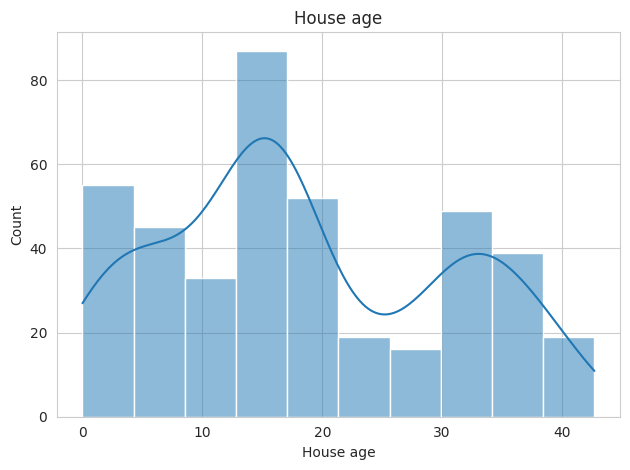

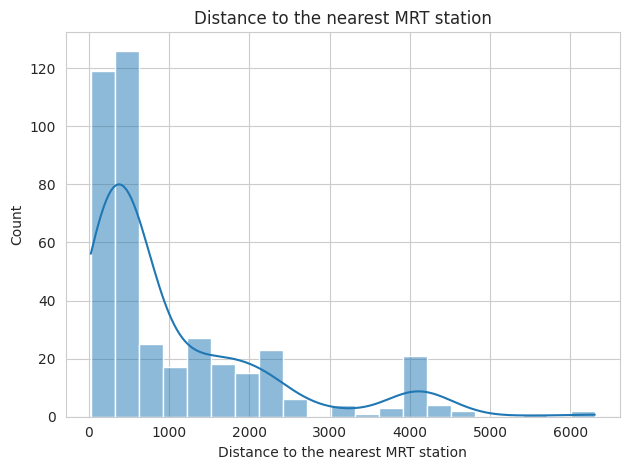

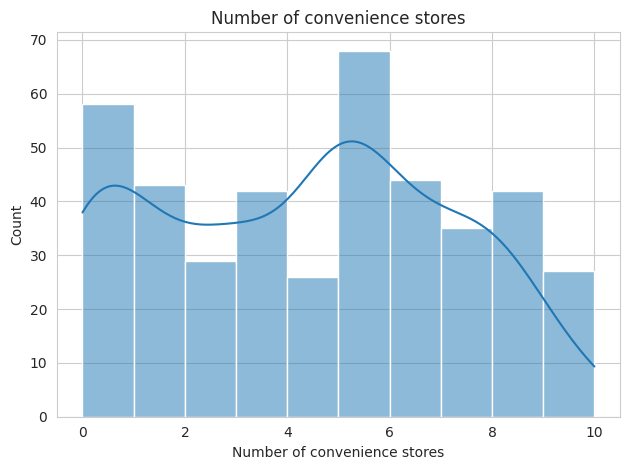

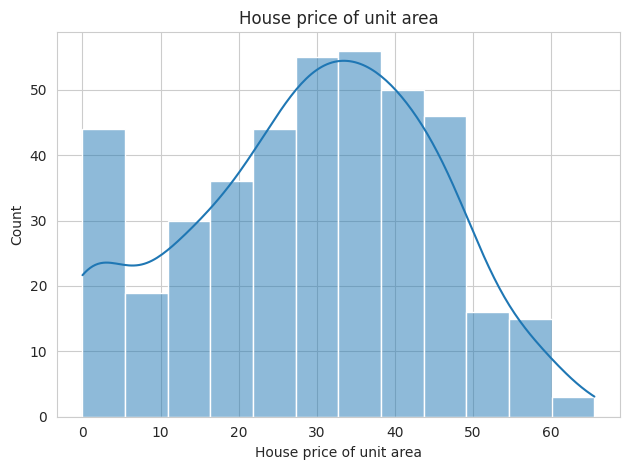

In [15]:
# Histogram of the numerical columns
sns.set_style('whitegrid')
cols=['House age', 'Distance to the nearest MRT station','Number of convenience stores', 'House price of unit area']
for col in cols:
  sns.histplot(house_data[col],kde=True)
  plt.title(col)
  plt.tight_layout()
  plt.show()


## **Interpreting the histograms:**
- House Age: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).
- Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.
- Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.
- House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

<Axes: xlabel='Latitude', ylabel='House price of unit area'>

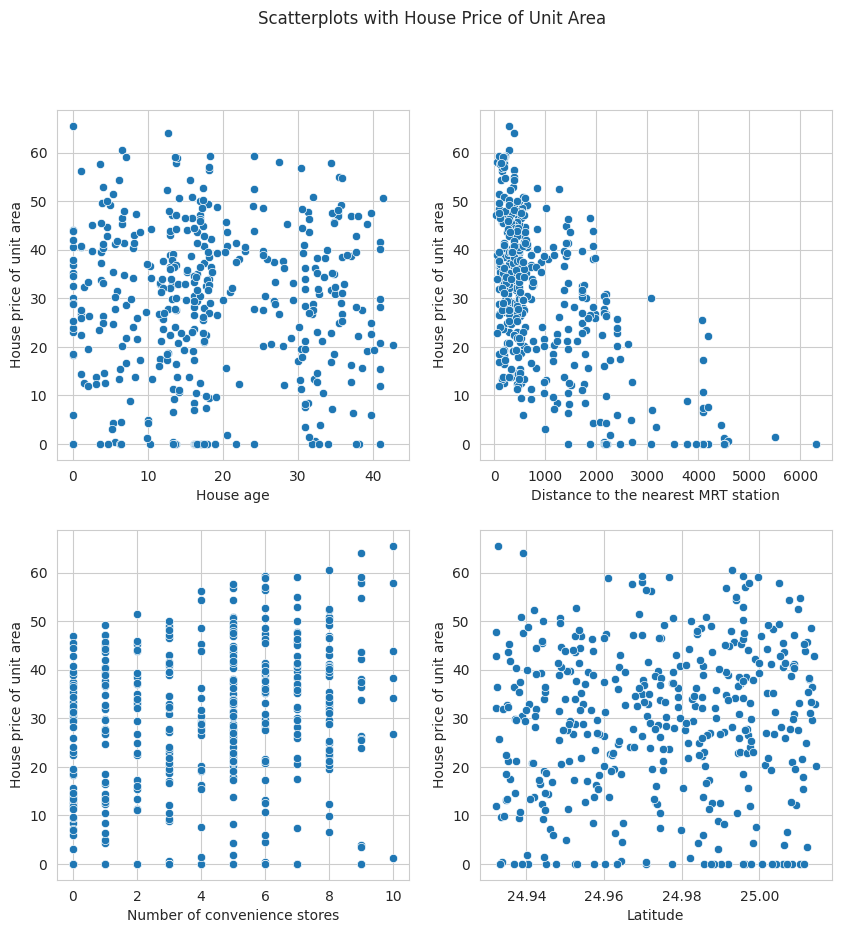

In [20]:
# Let us now observe the relationship of various variables with the price of the house using scatter plots
fig,axes=plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Scatterplots with House Price of Unit Area')
sns.scatterplot(data=house_data,x='House age',y='House price of unit area',ax=axes[0,0])
sns.scatterplot(data=house_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=house_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=house_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

## **Interpreting the plots obtained:**
- House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.
- Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.
- Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.
- Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable.

<ipython-input-21-85ba53c104f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=house_data.corr()


<Axes: >

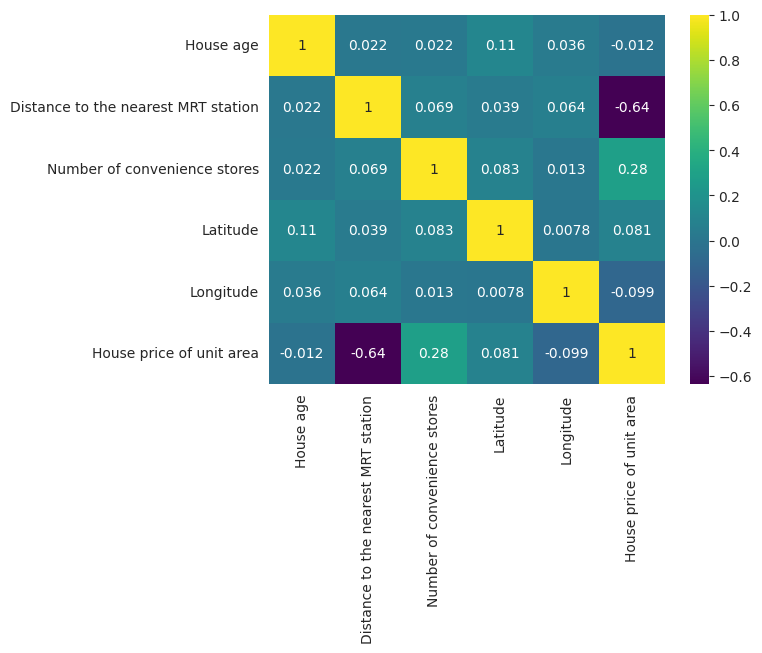

In [21]:
# correlation matrix
corr=house_data.corr()
sns.heatmap(corr,annot=True,cmap='viridis')# visualising correlation

## **Intepretations:**
- There seems to be strong negative correlation between House price and the Distance to the nearest MRT station. Other correlation values seem to be insignificant.
- Multicollinearity seems to be absent.

In [3]:
# Building a Linear Regression Model

# Selecting the features and the target
X=house_data.drop(columns=['House price of unit area','Transaction date'])
y=house_data['House price of unit area']

# Dividing the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=124)

model= LinearRegression()
model.fit(x_train,y_train) # fitting the model

# Making predictions
y_pred=model.predict(x_test)

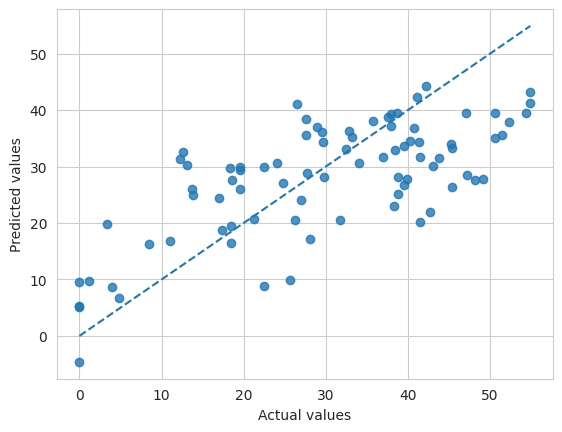

In [25]:
# Actual vs predicted values
plt.scatter(y_test,y_pred,alpha=0.8)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],ls='--',lw=1.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

- Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.
- Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

In [27]:
# Evaluation metrics
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 score: ',r2)
print('RMSE: ',rmse)

R2 score:  0.4781117379860581
RMSE:  10.704100571878636


In [30]:
# Train accuracy:
y_train_pred = model.predict(x_train)
r2_train=r2_score(y_train,y_train_pred)
print('R2 score for training data: ',r2_train)

R2 score for training data:  0.5257889085102658


The coefficient of determination (R2 score) is approximately 0.5. The model is able to explain only 50% of the variances in the data.

In [40]:
# Using ElastinNet Regression
# Dividing the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

# Create an Elastic Net model
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)  # You can adjust alpha and l1_ratio based on your needs

# Fit the model
elastic_net_model.fit(X_train, y_train)

# Make predictions
y_pred = elastic_net_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 108.91461533600487
R-squared: 0.5039067370967489


The model performance remains the same even after applying regularization techniques.

In [12]:
# Polynomial Regression

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test)

# Create a linear regression model
poly_model = LinearRegression()

# Fit the model on the polynomial features
poly_model.fit(X_train_poly, y_train)

# Make predictions on the polynomial features
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 130.9080636699413
R-squared: 0.40372916668697023


Linear Regression model gives us an R2 score of about 50%. This is better in comparison with the other regression models obtained.

## **Summary**
Real Estate Price Prediction is the process of estimating or forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings. The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions.